In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

size = 100, 100

path = 'COMP9517_20T2_Lab3_Images/'
img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


In [2]:
img = Image.open(path + img_names[0])

FileNotFoundError: [Errno 2] No such file or directory: 'COMP9517_20T2_Lab3_Images/shapes.png'

In [ ]:
img.size

In [ ]:
img.thumbnail(size) 

In [ ]:
img

In [ ]:
img.size

In [ ]:
img_mat = np.array(img)[:, :, :3]

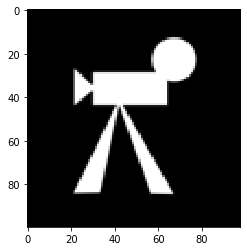

In [323]:
plt.imshow(img_mat)

In [324]:
img_mat.shape

(100, 98, 3)

In [325]:
img_mat_r = img_mat[:, :, 0]
img_mat_g = img_mat[:, :, 1]
img_mat_b = img_mat[:, :, 2]

In [326]:
img_mat_r.shape

(100, 98)

In [327]:
img_mat_r.flatten().reshape(-1,1).shape

(9800, 1)

In [328]:
img_flattened = np.concatenate((img_mat_r.flatten().reshape(-1,1), img_mat_g.flatten().reshape(-1,1), img_mat_b.flatten().reshape(-1,1)), axis=1)

In [329]:
img_flattened.shape

(9800, 3)

In [335]:
result = MeanShift(bandwidth=5).fit_predict(img_flattened)

In [336]:
result.shape

(9800,)

In [337]:
result = np.reshape(result, [100, 98])

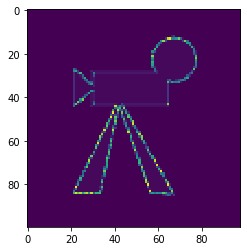

In [339]:
plt.imshow(result)

In [93]:
img_array = np.array(img.convert('L'))

In [95]:
img_array.shape

(100, 98)

In [96]:
distance = ndi.distance_transform_edt(img_array)

In [97]:
local_maxi = peak_local_max(distance, indices=False, labels=img_array) #寻找峰值
markers = ndi.label(local_maxi)[0] # 初始标记点

In [98]:
ws_labels = watershed(-distance, markers, mask=img_array) #基于距离变换的分水岭算法

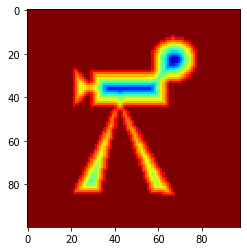

In [99]:
plt.imshow(-distance, cmap=plt.cm.jet)

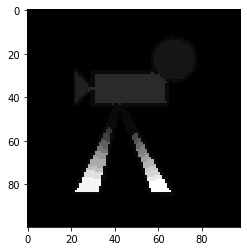

In [100]:
plt.imshow(ws_labels, cmap='gray')

In [101]:
#task 3

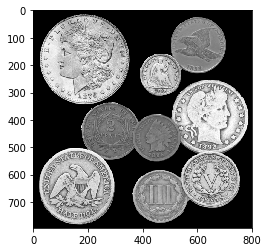

In [3]:
img = cv2.imread( 'coins.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [4]:
ret, thresh = cv2.threshold(gray,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# ret, thresh = cv2.threshold(gray,0,255, cv2.THRESH_OTSU)

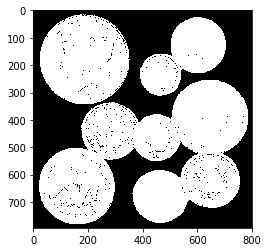

In [5]:
plt.imshow(thresh, 'gray')

In [6]:
# 噪声去除
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
# 确定背景区域-腐蚀
sure_bg = cv2.dilate(opening,kernel,iterations=9)
# 寻找前景区域
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

# sure_fg = cv2.erode(sure_fg, kernel, iterations=1)
# 找到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# unknown = cv2.subtract(sure_fg, sure_bg)

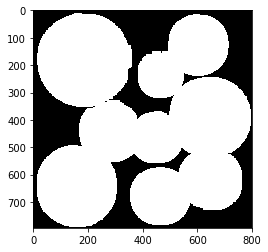

In [7]:
plt.imshow(sure_bg, 'gray')

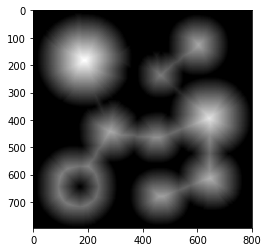

In [8]:
plt.imshow(dist_transform, 'gray')

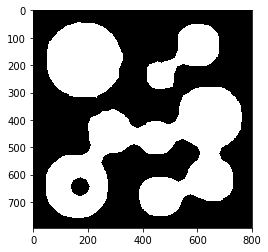

In [9]:
plt.imshow(sure_fg, 'gray')

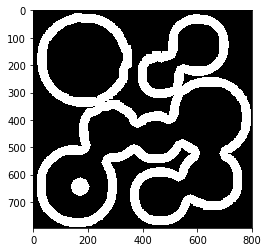

In [10]:
plt.imshow(unknown,'gray')

In [11]:
# 类别标记
ret, markers = cv2.connectedComponents(sure_fg)
# 为所有的标记加1，保证背景是0而不是1
markers = markers+1
# 现在让所有的未知区域为0
markers[unknown==255] = 0

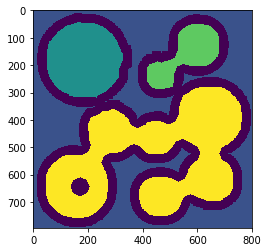

In [12]:
plt.imshow(markers)

In [13]:
markers = cv2.watershed(img,markers) 
img[markers == -1] = [255,0,0]

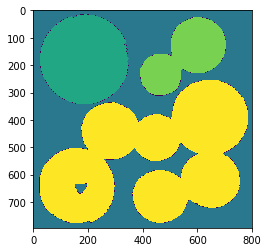

In [14]:
plt.imshow(markers)

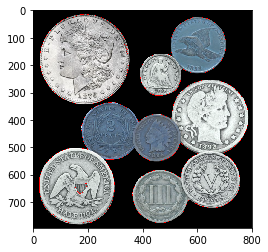

In [15]:
plt.imshow(img, 'gray')